In [19]:
#load sentiments_grouped.csv 

import pandas as pd
import numpy as np

df = pd.read_csv('balanced_sentimentdataset.csv')

#df = df.dropna()

df.head()

,Text,Sentiment
0,"Reflecting on a lifetime of memories, each wri...",Positive
1,Reflecting on the beauty of nature. ...,Positive
2,"Facing a defeat in the championship, the boxer...",Positive
3,Enthusiasm for learning new skills and expandi...,Positive
4,"Bathed in the glow of inspiration, a creative...",Positive


In [2]:
df = df.drop_duplicates(subset=['Text'], keep='first')

In [3]:
df.groupby('Sentiment').count()


,Unnamed: 0.1,Unnamed: 0,Text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group
Sentiment,,,,,,,,,,,,,,,,
Acceptance,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Acceptance,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Accomplishment,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Admiration,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Admiration,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wonder,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Wonder,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Wonderment,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


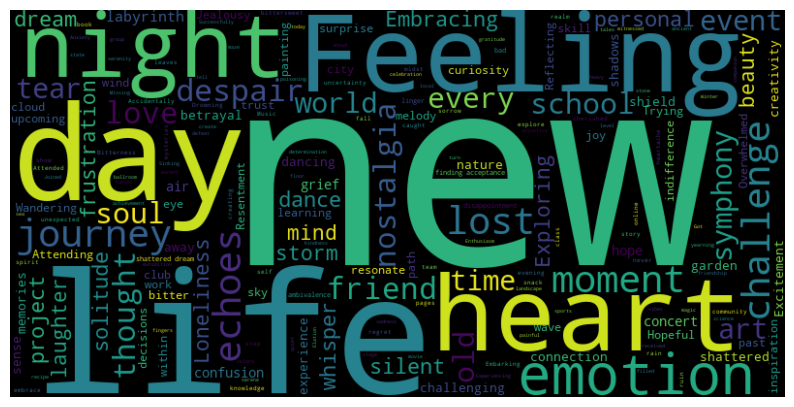

In [20]:
#Word Frequency and Text Analysis: Use natural language processing to identify common words, phrases, and topics, utilizing tools like word clouds or TF-IDF analysis.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of words

text = df['Text'].values

# Join the list of words into a single string

text = ' '.join(text)

# Create the word cloud object

wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud

plt.figure(figsize=(10,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

In [46]:
#unique values in the column 'sentiment'

len(df['Sentiment'].unique())

3

In [49]:
#sentiment_group unique values
df['Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [21]:
#Clean the text data by removing irrelevant information such as URLs, special characters, and emojis.

import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text) #remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text) #remove special characters
    text = text.encode('ascii', 'ignore').decode('ascii') #remove emojis
    return text

df['cleaned_text'] = df['Text'].apply(clean_text)

df.head()

,Text,Sentiment,cleaned_text
0,"Reflecting on a lifetime of memories, each wri...",Positive,Reflecting on a lifetime of memories each wrin...
1,Reflecting on the beauty of nature. ...,Positive,Reflecting on the beauty of nature ...
2,"Facing a defeat in the championship, the boxer...",Positive,Facing a defeat in the championship the boxer ...
3,Enthusiasm for learning new skills and expandi...,Positive,Enthusiasm for learning new skills and expandi...
4,"Bathed in the glow of inspiration, a creative...",Positive,Bathed in the glow of inspiration a creative ...


In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensuring the necessary NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and convert words to lower case
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Assuming 'df' is your DataFrame and it has a column 'cleaned_text' that contains text
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

# Display the first few rows to verify the changes
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,Sentiment,cleaned_text
0,"Reflecting on a lifetime of memories, each wri...",Positive,Reflecting lifetime memories wrinkle tells sto...
1,Reflecting on the beauty of nature. ...,Positive,Reflecting beauty nature
2,"Facing a defeat in the championship, the boxer...",Positive,Facing defeat championship boxer reflects chal...
3,Enthusiasm for learning new skills and expandi...,Positive,Enthusiasm learning new skills expanding knowl...
4,"Bathed in the glow of inspiration, a creative...",Positive,Bathed glow inspiration creative phoenix risin...


In [23]:
#Normalize the text by converting it to lowercase and lemmatizing or stemming words to reduce variation.

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(lemmatized_words)

df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'text' is the column with social media posts and 'sentiment_class' is the target column
X = df['cleaned_text']
y = df['Sentiment']

# Convert text data into numerical data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross validation

print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

              precision    recall  f1-score   support

    Negative       0.75      1.00      0.86        30
     Neutral       1.00      0.16      0.28        25
    Positive       0.72      0.94      0.82        36

    accuracy                           0.75        91
   macro avg       0.82      0.70      0.65        91
weighted avg       0.81      0.75      0.68        91

Score: 0.68 (+/- 0.23)


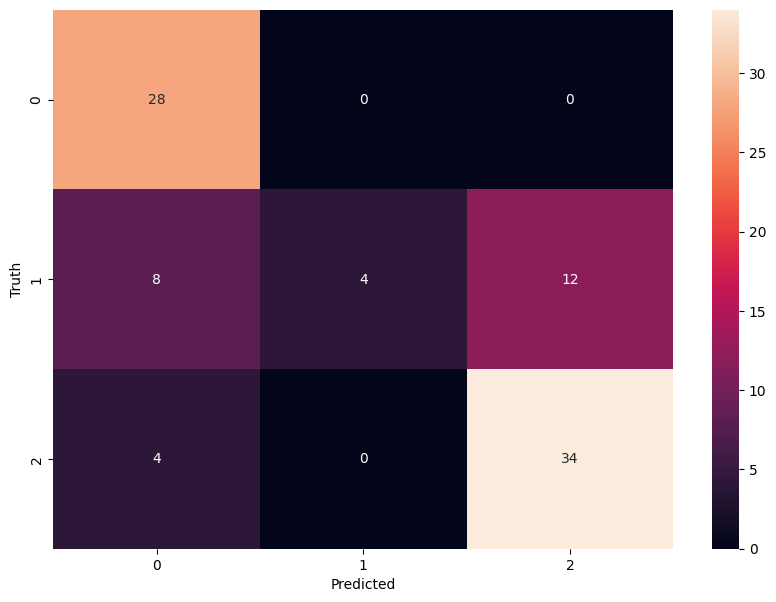

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [108]:
def predict_category(input_string, model, vectorizer):
    # Transform the input_string into the same format as your training data
    input_vector = vectorizer.transform([input_string])
    
    # Use the model to predict probabilities for each class
    probabilities = model.predict_proba(input_vector)

    # Assuming 'classes_' are the class labels you have in your data
    class_labels = model.classes_

    # Create a dictionary that maps class labels to probabilities
    prob_dict = dict(zip(class_labels, probabilities[0]))

    # Sort the dictionary by probability
    sorted_prob_dict = dict(sorted(prob_dict.items(), key=lambda item: item[1], reverse=True))

    # Convert the probabilities to percentages and return the result
    return {k: f"{v * 100:.2f}%" for k, v in sorted_prob_dict.items()}

# Test the function
input_string = "I cannot believe this could happen to me"
input_string2 = "What a beautiful day!"
input_string3 = " Technology is changing the way we live"
cleaned_text = lemmatize_text(remove_stopwords(clean_text(input_string))) 
cleaned_text2 = lemmatize_text(remove_stopwords(clean_text(input_string2)))
cleaned_text3 = lemmatize_text(remove_stopwords(clean_text(input_string3)))

print(predict_category(cleaned_text, model, vectorizer))
print(predict_category(cleaned_text2, model, vectorizer))
print(predict_category(cleaned_text3, model, vectorizer))

{'Negative': '46.96%', 'Positive': '35.22%', 'Neutral': '17.82%'}
{'Positive': '42.44%', 'Negative': '30.67%', 'Neutral': '26.89%'}
{'Neutral': '41.89%', 'Negative': '29.72%', 'Positive': '28.39%'}


This is where the final product stuff ends.

In [55]:
import spacy
import numpy as np

# Load the spacy model that you have installed
nlp = spacy.load('en_core_web_md')

# process a sentence using the model
def average_word_vectors(sentence):
    # This will return a document object
    doc = nlp(sentence)
    # doc.vector will return the average word vector for the entire document
    return doc.vector

# Get document level embeddings
spacy_feature_array = np.array([average_word_vectors(sent) for sent in df['lemmatized_text']])

In [56]:
#some feature engineering

#TF-IDF Analysis

from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer object

vectorizer = TfidfVectorizer()

# Fit the vectorizer object to the text data
nltk.download('averaged_perceptron_tagger')

data_placeholder = vectorizer.fit_transform(df['cleaned_text']).toarray()


from nltk import pos_tag

def count_pos_tags(text):
    tagged = pos_tag(word_tokenize(text))
    count_noun = len([word for word, pos in tagged if pos in ['NN', 'NNS', 'NNP', 'NNPS']])
    count_verb = len([word for word, pos in tagged if pos in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']])
    count_adj = len([word for word, pos in tagged if pos in ['JJ', 'JJR', 'JJS']])
    return count_noun, count_verb, count_adj

pos_counts = np.array([count_pos_tags(text) for text in df['Text']])

X = np.hstack([spacy_feature_array, data_placeholder, pos_counts])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [57]:
from nltk import ngrams
from nltk.tokenize import word_tokenize

def generate_ngrams(text, n=2):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Applying n-grams function to the 'text' column
df['bigrams'] = df['Text'].apply(generate_ngrams)

# Output the DataFrame
print(df[['Text', 'bigrams']])

# Convert the list of bigrams into a single string for each document
df['bigrams_str'] = df['bigrams'].apply(' '.join)

                                                  Text  \
0    Reflecting on a lifetime of memories, each wri...   
1     Reflecting on the beauty of nature.          ...   
2    Facing a defeat in the championship, the boxer...   
3    Enthusiasm for learning new skills and expandi...   
4     Bathed in the glow of inspiration, a creative...   
..                                                 ...   
447  Participating in a science fair to showcase a ...   
448  Attending a workshop on time management to enh...   
449  Volunteering at a local charity event to give ...   
450  Collaborating on a group project to promote te...   
451  Participating in a debate club to enhance crit...   

                                               bigrams  
0    [Reflecting on, on a, a lifetime, lifetime of,...  
1    [Reflecting on, on the, the beauty, beauty of,...  
2    [Facing a, a defeat, defeat in, in the, the ch...  
3    [Enthusiasm for, for learning, learning new, n...  
4    [Bathed in, i

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#X = df['bigrams_str']
X = np.hstack([spacy_feature_array, data_placeholder, pos_counts])
y = df['Sentiment']

# Convert bigrams into numerical data
vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.78      0.89      0.83        28
     Neutral       0.57      0.33      0.42        24
    Positive       0.68      0.79      0.73        38

    accuracy                           0.70        90
   macro avg       0.68      0.67      0.66        90
weighted avg       0.68      0.70      0.68        90



c:\Users\Benjamin\Desktop\Yale-NUS Machine Learning\Final_project\categoriesenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer

#bag of words model

# Create the vectorizer object

vectorizer = TfidfVectorizer()

# Fit the vectorizer object to the text data

X = vectorizer.fit_transform(df['lemmatized_text'])
y = df['sentiment_group']

# Create a DataFrame from the word count array

df_word_count = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame

df_word_count.head()





# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

input_string_ex = "wow I am so surprised"

def predict_class(input_string):
    # Preprocess the input string
    cleaned_text = lemmatize_text(remove_stopwords(clean_text(input_string)))  # Replace with your text cleaning function
    X_input = vectorizer.transform([cleaned_text])

    # Use the model to predict the class
    y_pred = model.predict(X_input)

    return y_pred[0]

scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross validation

print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

              precision    recall  f1-score   support

     fearful       0.73      0.32      0.45        34
       happy       0.50      0.50      0.50        26
    negative       0.53      0.73      0.61        37
    positive       0.39      0.63      0.48        30
   surprised       1.00      0.07      0.12        15

    accuracy                           0.50       142
   macro avg       0.63      0.45      0.43       142
weighted avg       0.59      0.50      0.47       142

Score: 0.42 (+/- 0.22)


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Assuming X is your feature set and y are the labels
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
scores = cross_val_score(model, X, y, cv=10)  # 5-fold cross validation

print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


              precision    recall  f1-score   support

     fearful       0.70      0.54      0.61        39
       happy       0.65      0.52      0.58        33
    negative       0.63      0.53      0.58        36
    positive       0.56      0.61      0.58        31
   surprised       0.59      0.88      0.71        40

    accuracy                           0.62       179
   macro avg       0.63      0.61      0.61       179
weighted avg       0.63      0.62      0.61       179

Score: 0.48 (+/- 0.29)
Score: 0.50 (+/- 0.18)


Overfitting: The resampling process might be causing the model to overfit to the minority class. This would result in poor performance on the test set (as shown in the classification report) but similar performance on cross-validation because the same resampling process is applied to each fold of the cross-validation.

Data Distribution: The distribution of the data in the resampled dataset might be different from the original dataset. If the model is trained on the resampled data but tested on the original data, it might perform poorly because it's not well adapted to the original data distribution.

Noise Introduction: Resampling techniques like SMOTE can introduce noise by creating synthetic examples that are not representative of the true underlying relationships in the data. This could potentially lead to worse performance on the classification report.

Model Sensitivity: Logistic regression is a linear model, which might not be complex enough to capture the patterns in the resampled data. This could result in worse performance on the classification report.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming that 'vectorizer' is the TfidfVectorizer or CountVectorizer you used for your text data
# Create the vectorizer object

vectorizer = CountVectorizer()

# Fit the vectorizer object to the text data

X = vectorizer.fit_transform(df['cleaned_text'])

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)  # Replace 'X_train' and 'y_train' with your actual training data


def predict_category(input_string, model, vectorizer):
    # Transform the input_string into the same format as your training data
    input_vector = vectorizer.transform([input_string])
    
    # Use the model to predict probabilities for each class
    probabilities = model.predict_proba(input_vector)

    # Assuming 'classes_' are the class labels you have in your data
    class_labels = model.classes_

    # Create a dictionary that maps class labels to probabilities
    prob_dict = dict(zip(class_labels, probabilities[0]))

    # Sort the dictionary by probability
    sorted_prob_dict = dict(sorted(prob_dict.items(), key=lambda item: item[1], reverse=True))

    # Convert the probabilities to percentages and return the result
    return {k: f"{v * 100:.2f}%" for k, v in sorted_prob_dict.items()}

# Test the function
input_string = "I cannot believe this could happen to me"
cleaned_text = lemmatize_text(remove_stopwords(clean_text(input_string)))  # Replace with your text cleaning function

print(predict_category(cleaned_text, model, vectorizer))

{'surprised': '33.64%', 'fearful': '24.55%', 'positive': '18.80%', 'happy': '11.95%', 'negative': '11.06%'}


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from transformers import BertModel, BertTokenizer
import torch
import numpy as np

# Load pretrained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Convert text to BERT embeddings
def get_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        outputs = bert_model(**inputs)
        last_hidden_states = outputs.last_hidden_state
        bert_embedding = last_hidden_states.mean(1)
        embeddings.append(bert_embedding.detach().numpy())
    return np.concatenate(embeddings)

X = get_bert_embeddings(df['cleaned_text'])

y = df['sentiment_group']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.model_selection import cross_val_score
# Assuming X is your feature set and y are the labels
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
scores = cross_val_score(model, X, y, cv=10)  # 10-fold cross validation

print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


c:\Users\Benjamin\Desktop\Yale-NUS Machine Learning\Final_project\categoriesenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

     fearful       0.47      0.55      0.51        31
       happy       0.50      0.52      0.51        29
    negative       0.45      0.43      0.44        35
    positive       0.55      0.64      0.59        33
   surprised       0.40      0.14      0.21        14

    accuracy                           0.49       142
   macro avg       0.48      0.45      0.45       142
weighted avg       0.49      0.49      0.48       142



c:\Users\Benjamin\Desktop\Yale-NUS Machine Learning\Final_project\categoriesenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Benjamin\Desktop\Yale-NUS Machine Learning\Final_project\categoriesenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

Score: 0.37 (+/- 0.29)


c:\Users\Benjamin\Desktop\Yale-NUS Machine Learning\Final_project\categoriesenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


One reason that bert could be giving us worse data is that it is trained on Wikipedia and therefore more serious text.

A very interesting aspect about the classification of our data is that it is in the context of social media, which has conversational tones and a much less structured form of language than semantic dictionary english. I could imagine that it would be harder for an AI Model to pin down the sentiment of social media posts the same as humans.

Another interesting finding is how the models pick up and return sentences that dont seem like they would be positive or negative, but when reread from the perspective of how I would view a tweet written the exact same way, I see the sentiment that the models finds to be a better understanding than originally

